In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from tqdm import trange,tqdm

In [2]:
data = pd.read_csv("./2013-10 - Citi Bike trip data.csv",sep=",")

In [13]:
# 数据结构
# # tripduration
# # starttime
# # stoptime
# # start station id
# # start station name
# # start station latitude
# # start station longitude
# # end station id
# # end station name
# # end station latitude
# # end station longitude
# # bikeid
# # usertype
# # birth year
# # gender

node = {}
edge = {}
cnt = 1
# 10月1日-10月31日 每个小时作为一个时间间隔
outflow = [[{} for _ in range(0,24)]for _ in range(0,32)]
inflow = [[{} for _ in range(0,24)]for _ in range(0,32)]

for i in trange(0,len(data)):
    startID = data["start station id"][i]
    endID = data["end station id"][i]
    # 添加节点
    if startID not in node:
        node[startID] = {"lat":data["start station latitude"][i],
                         "lon":data["start station longitude"][i]}
    
    if endID not in node:
        node[endID] = {"lat":data["end station latitude"][i],
                       "lon":data["end station longitude"][i]}

    # 添加边
    edgeID = str(startID)+":"+str(endID)
    if edgeID not in edge:
        edge.update({edgeID:cnt})
        cnt += 1 
        
    # 添加出流
    flowID = str(startID)+":"+str(endID) 
    date = int(data["starttime"][i].strip("\"")[8:10])
    time = int(data["starttime"][i].strip("\"")[11:13])
    if flowID not in outflow[date][time]:
        outflow[date][time][flowID] = 1
    else:
        outflow[date][time][flowID] += 1 
        
    # 添加入流
    date = int(data["stoptime"][i].strip("\"")[8:10])
    time = int(data["stoptime"][i].strip("\"")[11:13])
    if flowID not in inflow[date][time]:
        inflow[date][time][flowID] = 1
    else:
        inflow[date][time][flowID] += 1 
        

100%|██████████| 1037712/1037712 [00:25<00:00, 40470.88it/s]


In [14]:
with open("./node.txt","w") as file:
    for i in node:
        file.writelines("{}\t{}\t{}\n".format(i,node[i]["lat"],node[i]["lon"]))

In [15]:
with open("./edge.txt","w") as file:
    for i in edge:
        tmp = i.split(":")
        file.writelines("{}\t{}\t{}\n".format(edge[i],tmp[0],tmp[1]))

In [18]:
for i in range(1,len(inflow)):
    for j in range(0,24):
        with open("./flow/flow_{}_{}.txt".format(i,j),"w") as file:
            for k in inflow[i][j]:
                IDs = k.split(":")
                file.writelines("0\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\n".format(j,edge[k],IDs[0],node[int(IDs[0])]["lat"],node[int(IDs[0])]["lon"],
                                                                                 IDs[1],node[int(IDs[1])]["lat"],node[int(IDs[1])]["lon"],inflow[i][j][k]))
            for k in outflow[i][j]:
                IDs = k.split(":")
                file.writelines("0\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\n".format(j,edge[k],IDs[0],node[int(IDs[0])]["lat"],node[int(IDs[0])]["lon"],
                                                                                 IDs[1],node[int(IDs[1])]["lat"],node[int(IDs[1])]["lon"],outflow[i][j][k]))
            
                

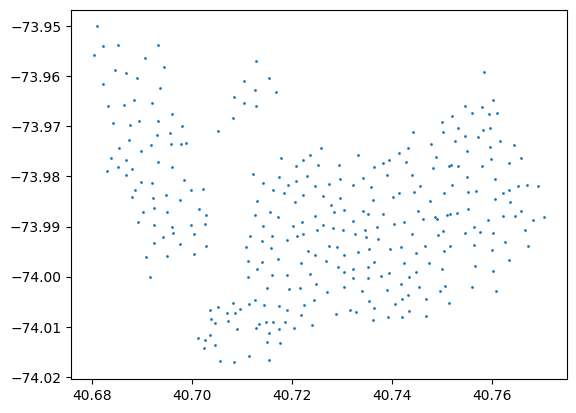

In [8]:
lat = [node[i]["lat"] for i in node]
lon = [node[i]["lon"] for i in node]

plot.scatter(lat,lon,1)
plot.show()